In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df = pd.read_csv('gdrive/My Drive/Telkom_2.csv')

In [ ]:
pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 18 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619418 sha256=0524ac82be6f71bb595eb331a6b0cfefac7c687a658d637222c317565d219d0c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
!pip install --user plotly.express

In [ ]:
# Importing Numpy, Pandas
import numpy as np
import pandas as pd

# Visuals
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import matplotlib.style as style
from plotly.subplots import make_subplots
from scipy import stats
import pickle
%matplotlib inline


# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.simplefilter(action='ignore')

# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import KNNWithMeans, KNNWithZScore
from surprise import KNNBasic, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import NormalPredictor
from surprise import BaselineOnly
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time

In [ ]:
df

Unnamed: 0                     period  ...  resource_id          msisdn_anon
0                0  2021-05-01 00:00:00+00:00  ...          NaN -2675768557369516986
1                1  2021-08-01 00:00:00+00:00  ...          NaN  7787829842737595857
2                2  2021-04-01 00:00:00+00:00  ...        R2197  6653608605607772176
3                3  2020-11-01 00:00:00+00:00  ...        S2728  5755330445238999520
4                4  2021-08-01 00:00:00+00:00  ...        S2252 -7460825266039012513
...            ...                        ...  ...          ...                  ...
999995      999995  2021-02-01 00:00:00+00:00  ...          NaN -1836571857264745599
999996      999996  2021-03-01 00:00:00+00:00  ...        S2743 -5407188659712524516
999997      999997  2021-07-01 00:00:00+00:00  ...        S2731 -8572230925817490729
999998      999998  2021-05-01 00:00:00+00:00  ...          NaN  -608713708231476010
999999      999999  2021-06-01 00:00:00+00:00  ...        S2642 -1558317284986334638

[1000000 rows x 14 columns]

In [ ]:
# Drop first column of dataframe
df = df.iloc[: , 1:]

In [ ]:
df

period  ...          msisdn_anon
0       2021-05-01 00:00:00+00:00  ... -2675768557369516986
1       2021-08-01 00:00:00+00:00  ...  7787829842737595857
2       2021-04-01 00:00:00+00:00  ...  6653608605607772176
3       2020-11-01 00:00:00+00:00  ...  5755330445238999520
4       2021-08-01 00:00:00+00:00  ... -7460825266039012513
...                           ...  ...                  ...
999995  2021-02-01 00:00:00+00:00  ... -1836571857264745599
999996  2021-03-01 00:00:00+00:00  ... -5407188659712524516
999997  2021-07-01 00:00:00+00:00  ... -8572230925817490729
999998  2021-05-01 00:00:00+00:00  ...  -608713708231476010
999999  2021-06-01 00:00:00+00:00  ... -1558317284986334638

[1000000 rows x 13 columns]

In [ ]:
n_resource = len(df['resource_account_desc'].unique())
n_subscribers = len(df['subscriber_id'].unique())

print(f"Number of unique resource_account: {n_resource}")
print(f"Number of unique subscribers: {n_subscribers}")

Number of unique resource_account: 106
Number of unique subscribers: 906789


In [ ]:
df.loc[df['subscriber_type'] == '0', 'subscriber_type'] = 'Prepaid'  
df.loc[df['subscriber_type'] == '1', 'subscriber_type'] = 'Postpaid'  
df.loc[df['subscriber_type'] == '3', 'subscriber_type'] = 'Hybrid' 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   period                   1000000 non-null  object 
 1   subscriber_id            1000000 non-null  int64  
 2   resource_account_type    1000000 non-null  int64  
 3   resource_account_desc    1000000 non-null  object 
 4   bundle_remaining_value   1000000 non-null  float64
 5   bundle_original_value    1000000 non-null  float64
 6   resource_allocated_date  1000000 non-null  object 
 7   resource_expiry_date     1000000 non-null  object 
 8   rate_plan_id             1000000 non-null  int64  
 9   subscriber_type          1000000 non-null  object 
 10  fmc_flag                 1000000 non-null  int64  
 11  resource_id              672423 non-null   object 
 12  msisdn_anon              1000000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory u

In [ ]:
df.resource_allocated_date = pd.to_datetime(df.resource_allocated_date)
df.period = pd.to_datetime(df.period)
df.resource_expiry_date = pd.to_datetime(df.resource_expiry_date)



**GET DATA FROM 2019 JANUARY TO 2021 AUGUST**

In [ ]:
ctm_bhvr_dt = df[(df.resource_allocated_date < pd.Timestamp(2021,9,1).tz_localize('US/Eastern')) & (df.resource_allocated_date >= pd.Timestamp(2019,1,1).tz_localize('US/Eastern'))].reset_index(drop=True)
ctm_bhvr_dt

period  ...          msisdn_anon
0      2021-05-01 00:00:00+00:00  ... -2675768557369516986
1      2021-08-01 00:00:00+00:00  ...  7787829842737595857
2      2021-04-01 00:00:00+00:00  ...  6653608605607772176
3      2020-11-01 00:00:00+00:00  ...  5755330445238999520
4      2021-08-01 00:00:00+00:00  ... -7460825266039012513
...                          ...  ...                  ...
940874 2021-02-01 00:00:00+00:00  ... -1836571857264745599
940875 2021-03-01 00:00:00+00:00  ... -5407188659712524516
940876 2021-07-01 00:00:00+00:00  ... -8572230925817490729
940877 2021-05-01 00:00:00+00:00  ...  -608713708231476010
940878 2021-06-01 00:00:00+00:00  ... -1558317284986334638

[940879 rows x 13 columns]

**GET DATA FROM 2021 September till 1st October**

In [ ]:
ctm_next_quarter = df[(df.resource_allocated_date <= pd.Timestamp(2021,10,1).tz_localize('US/Eastern')) & (df.resource_allocated_date >= pd.Timestamp(2021,9,1).tz_localize('US/Eastern'))].reset_index(drop=True)
ctm_next_quarter

period  subscriber_id  ...  resource_id          msisdn_anon
0     2021-09-01 00:00:00+00:00  2000159592865  ...        S2569 -1670355767727492239
1     2021-09-01 00:00:00+00:00  2000123536144  ...        S2317 -8447670710151667877
2     2021-09-01 00:00:00+00:00  2000100169157  ...          NaN -1526988945119570192
3     2021-09-01 00:00:00+00:00  2000162062287  ...          NaN -3094889493825278409
4     2021-09-01 00:00:00+00:00  2000155541403  ...          NaN   499162075894811165
...                         ...            ...  ...          ...                  ...
59116 2021-09-01 00:00:00+00:00  2000094022204  ...        S2637  5942456389789049131
59117 2021-09-01 00:00:00+00:00  2000140207799  ...          NaN -8213539696984299092
59118 2021-09-01 00:00:00+00:00  2000165215060  ...          NaN -6243942388886564114
59119 2021-09-01 00:00:00+00:00  2000165114852  ...          NaN   277073049172265480
59120 2021-09-01 00:00:00+00:00  2000145731792  ...          NaN -1757731286646842893

[59121 rows x 13 columns]

In [ ]:
# Get the distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['subscriber_id'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['CustomerID']
ctm_dt

CustomerID
0       2000083399818
1       2000152693675
2       2000135486464
3       2000144756627
4       2000123351511
...               ...
857211  2000130543590
857212  2000130630448
857213  2000117580091
857214  2000151085788
857215  2000136756968

[857216 rows x 1 columns]

In [ ]:
# Create a dataframe with CustomerID and customers first purchase 
# date in the dataset ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('subscriber_id').resource_allocated_date.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID', 'MinPurchaseDate']

# Create a dataframe with CustomerID and customers last purchase 
# date in the dataset ctm_bhvr_dt
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('subscriber_id').resource_allocated_date.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID', 'MaxPurchaseDate']

# Merge two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID', how='left')

# Get the difference in days from MinPurchaseDate and MaxPurchaseDate for each customer
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

# Update the dataframe ctm_dt by merging it with the NextPurchaseDay column of the dataframe ctm_purchase_dates
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID', 'NextPurchaseDay']], on='CustomerID', how='left')
# Fill all missing values in the dataset ctm_dt with the number 9999
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

CustomerID  NextPurchaseDay
0  2000083399818           9999.0
1  2000152693675           9999.0
2  2000135486464           9999.0
3  2000144756627           9999.0
4  2000123351511             10.0

## **Recency**

In [ ]:
# Get the maximum purchase date of each customer and create a dataframe with it together with the customer's id.
ctm_max_purchase = ctm_bhvr_dt.groupby('subscriber_id').resource_allocated_date.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

# Find the recency of each customer in days
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt

CustomerID  NextPurchaseDay  Recency
0       2000083399818           9999.0       92
1       2000152693675           9999.0      175
2       2000135486464           9999.0      153
3       2000144756627           9999.0      298
4       2000123351511             10.0        7
...               ...              ...      ...
857211  2000130543590           9999.0      247
857212  2000130630448           9999.0      185
857213  2000117580091           9999.0      153
857214  2000151085788           9999.0       64
857215  2000136756968           9999.0      262

[857216 rows x 3 columns]

In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())

Recency
count  857216.000000
mean      164.323130
std       103.464036
min         0.000000
25%        73.000000
50%       157.000000
75%       246.000000
max       852.000000

In [ ]:
# plot histogram
hist_fig = px.histogram(ctm_dt, 
                        x="Recency", 
                        title="Customers Recency in Days", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Recency in groups of 20 days", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_ 

line_fig = px.line(x=list(my_dict.keys()), 
                   y=list(my_dict.values()), 
                   template="plotly_dark"
                  )

line_fig.update_layout(title_x=0, 
                       xaxis_title="Number of cluster", 
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})


In [ ]:
number_of_clusters = 2

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

CustomerID  NextPurchaseDay  Recency  RecencyCluster
0  2000083399818           9999.0       92               0
1  2000152693675           9999.0      175               1
2  2000135486464           9999.0      153               0
3  2000144756627           9999.0      298               1
4  2000123351511             10.0        7               0

In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean
        
    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns
    
    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name
    
    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name 
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    
    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index
    
    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on 
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)
    
    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)
    
    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})
    
    return df_final

In [ ]:

ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

CustomerID  NextPurchaseDay  Recency  RecencyCluster
0  2000083399818           9999.0       92               1
1  2000135486464           9999.0      153               1
2  2000123351511             10.0        7               1
3  2000156164159           9999.0        8               1
4  2000098785410           9999.0      103               1

In [ ]:

#print cluster characteristics
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

count        mean        std  ...    50%    75%    max
RecencyCluster                                   ...                     
0               404804.0  258.110431  55.684841  ...  251.0  304.0  852.0
1               452412.0   80.405208  50.950631  ...   83.0  124.0  169.0

[2 rows x 8 columns]

## **Frequency**

**Next, we will find customers purchase behaviour based on the number of times they buy from the online retail shop. That is, the total number of orders by each customer.**

In [ ]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df.groupby('subscriber_id').resource_allocated_date.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']
ctm_frequency

CustomerID  Frequency
0       2000020023091          1
1       2000020023785          1
2       2000020024160          1
3       2000020024355          1
4       2000020024385          1
...               ...        ...
906784  2000166844667          1
906785  2000166844713          1
906786  2000166844968          1
906787  2000166845052          1
906788  2000166845367          1

[906789 rows x 2 columns]

In [ ]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()

CustomerID  NextPurchaseDay  Recency  RecencyCluster  Frequency
0  2000083399818           9999.0       92               1          2
1  2000135486464           9999.0      153               1          1
2  2000123351511             10.0        7               1          2
3  2000156164159           9999.0        8               1          1
4  2000098785410           9999.0      103               1          4

In [ ]:
pd.DataFrame(ctm_dt.Frequency.describe())

Frequency
count  857216.000000
mean        1.108033
std         0.377980
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000

In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Frequency < 1200')['Frequency'], 
                        title="Customers with Purchase Frequency", 
                        template= "plotly_dark" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Customer Frequency Purchase in groups of 20", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

CustomerID  NextPurchaseDay  ...  Frequency  FrequencyCluster
0  2000083399818           9999.0  ...          2                 0
1  2000123351511             10.0  ...          2                 0
2  2000098785410           9999.0  ...          4                 0
3  2000145872744           9999.0  ...          2                 0
4  2000138534212           9999.0  ...          3                 0

[5 rows x 6 columns]

In [ ]:
#see details of each cluster
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

count      mean       std  min  25%  50%  75%   max
FrequencyCluster                                                        
0                  78181.0  2.184533  0.539757  2.0  2.0  2.0  2.0  15.0
1                 779035.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0

## **Overall Score**
Finally we sum all the cluster features

In [ ]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster']
ctm_dt.groupby('OverallScore')['Recency','Frequency'].mean()

Recency  Frequency
OverallScore                       
0             234.495214   2.091725
1             235.513479   1.156729
2              81.448584   1.000000

Since our goal is to estimate whether a customer will make a purchase in the next quarter, we will create a new column NextPurchaseDayRange with values as either $1$ or $0$ defined as follows:

If the value is $1$, then it indicates that the customer will buy something in the next quarter, i.e., $31$ days from his or her last purchase.
The value $0$ indicates that the customer will buy something in more than $31$ days from his or her last purchase.

In [ ]:
ctm_class = ctm_dt.copy()
ctm_class['NextPurchaseDayRange'] = 1  ## less than 1 month
ctm_class.loc[ctm_class.NextPurchaseDay>31,'NextPurchaseDayRange'] = 0 # more than 1 month
ctm_class.head()

CustomerID  NextPurchaseDay  ...  OverallScore  NextPurchaseDayRange
0  2000083399818           9999.0  ...             1                     0
1  2000123351511             10.0  ...             1                     1
2  2000098785410           9999.0  ...             1                     0
3  2000145872744           9999.0  ...             1                     0
4  2000138534212           9999.0  ...             1                     0

[5 rows x 8 columns]

Finally in this section, let's see the correlation between our features and label. We can achieve this by applying the corr method to the dataframe ctm_dt.

In [ ]:

corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

MinCorrelationCoeff  MaxCorrelationCoeff
CustomerID                      -0.143474             0.183242
NextPurchaseDay                 -0.327566             0.319138
Recency                         -0.857453             0.142001
RecencyCluster                  -0.857453             0.851389
Frequency                       -0.902231             0.123714
FrequencyCluster                -0.902231             0.415554
OverallScore                    -0.710852             0.851389
NextPurchaseDayRange            -0.308257             0.119987

From the output above, we observe that Overall Score has the highest positive correlation of $0.85$ with RecencyCluster and Frequency has the highest negative of $-0.90$ with FrequencyCluster.

We can get a good visualisation of the coefficient matrix below.

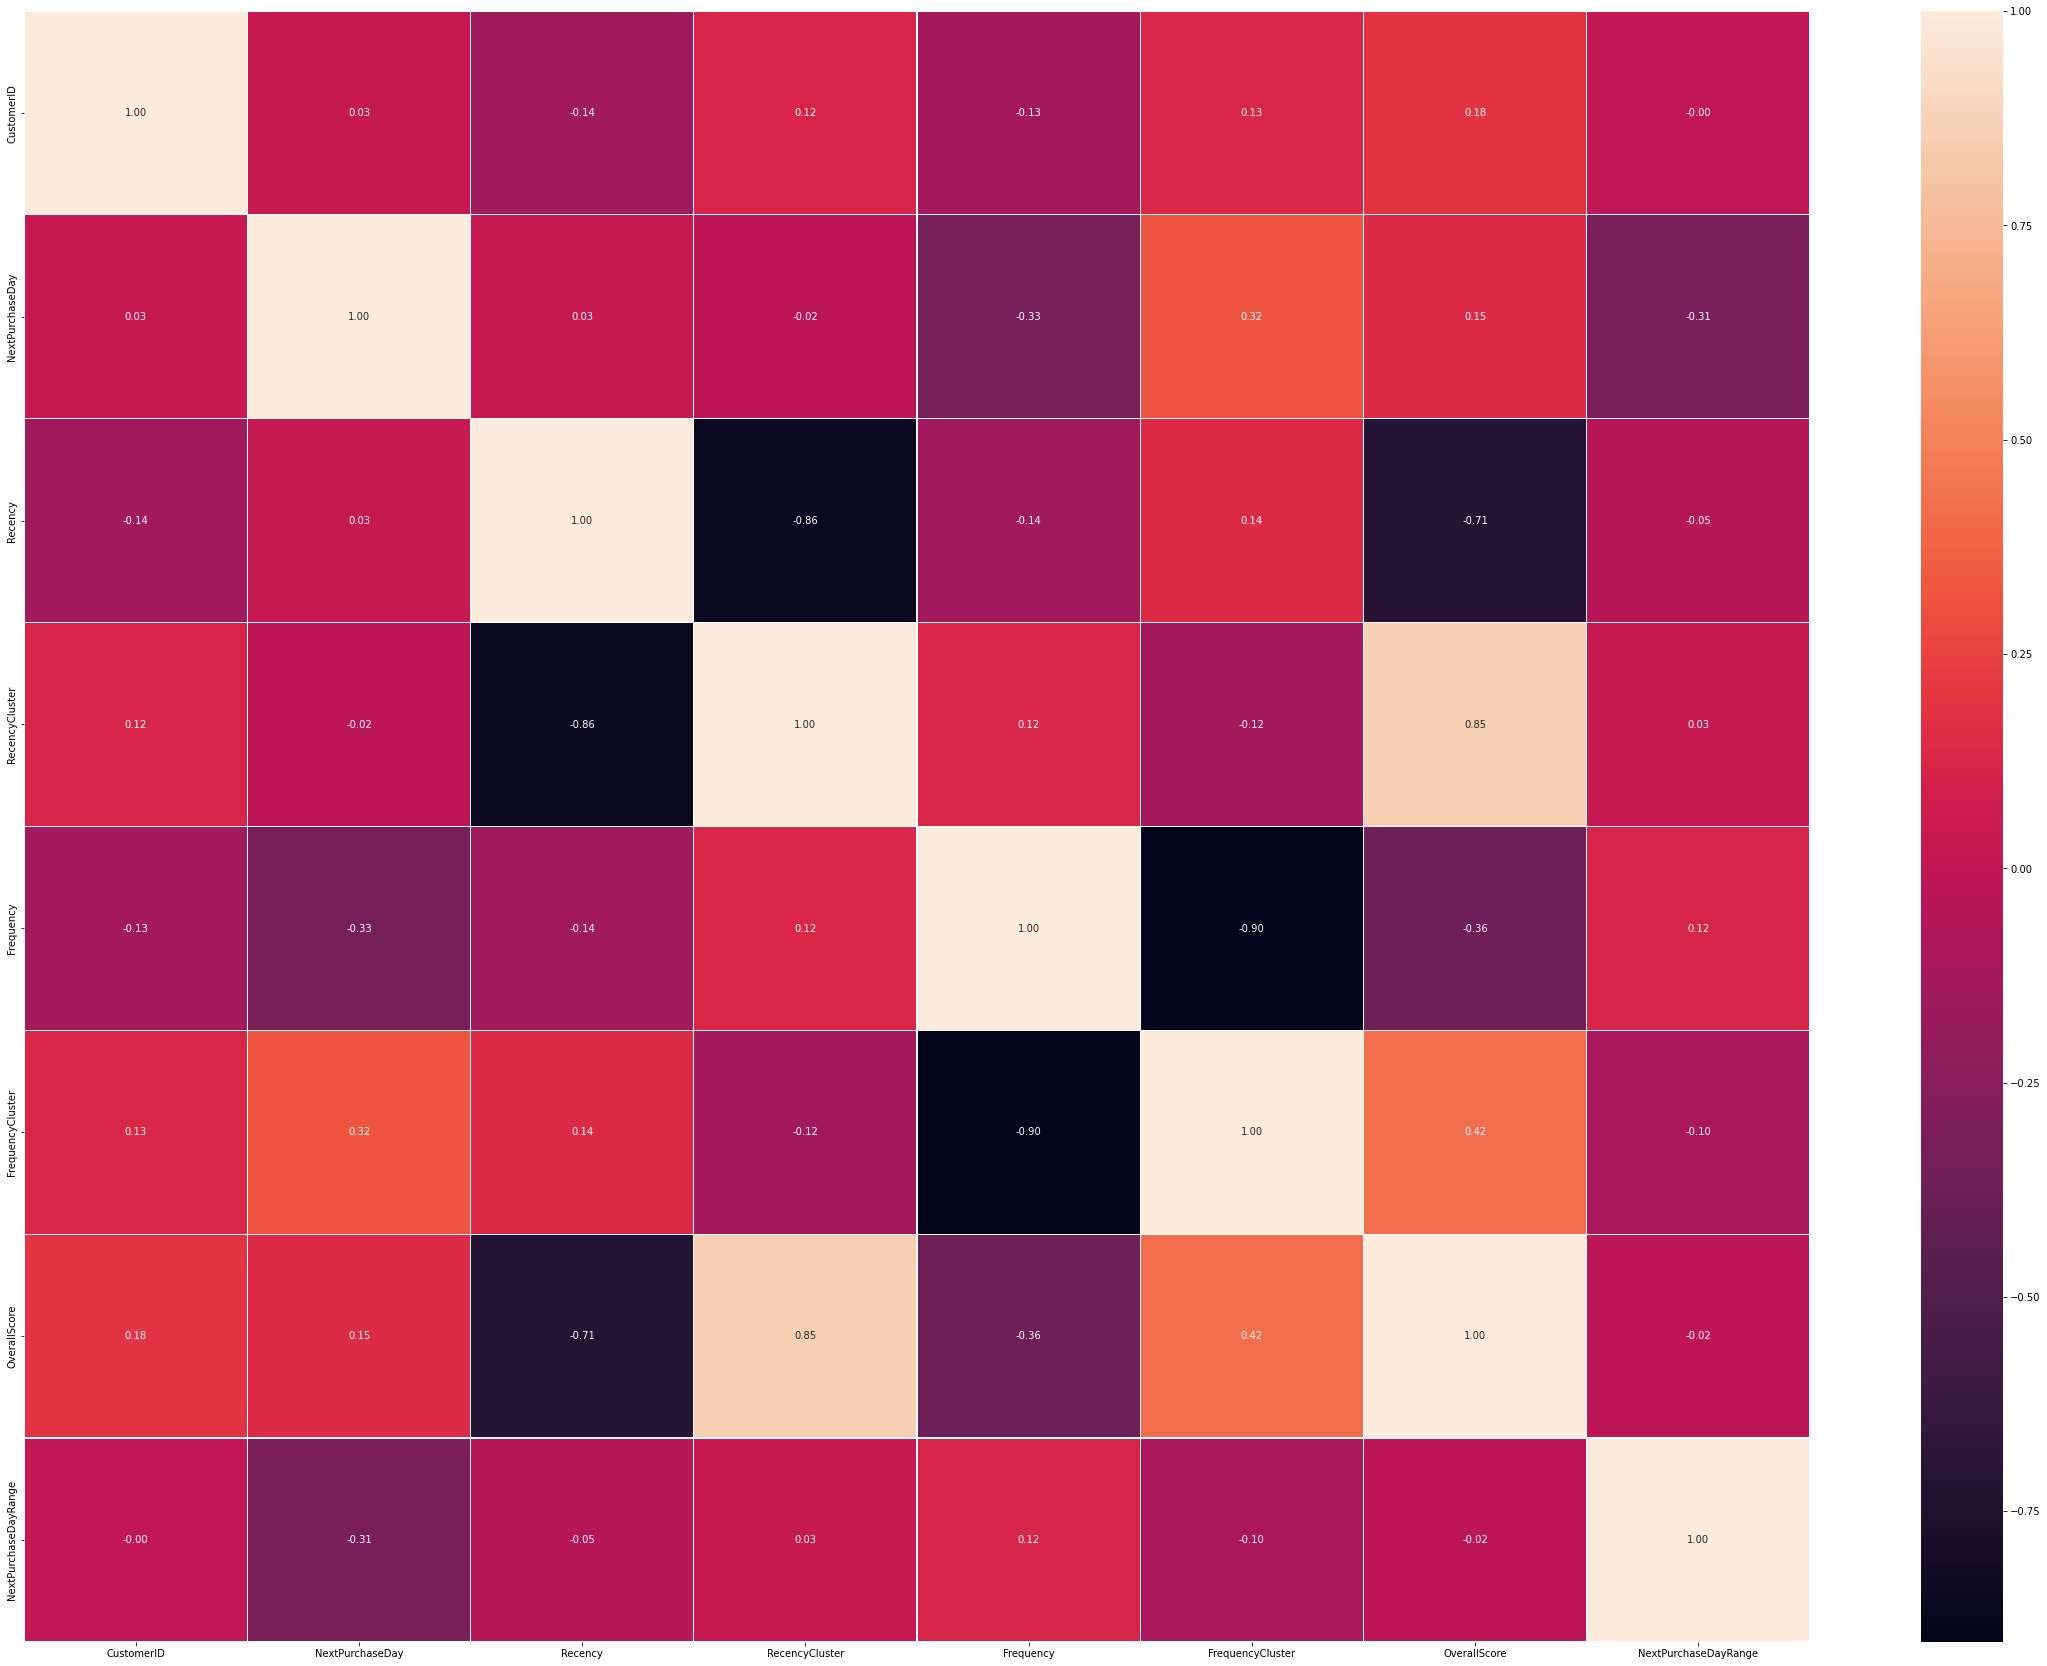

In [ ]:
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

# **Building Machine Learning models**

In [ ]:
ctm_class = ctm_class.drop('NextPurchaseDay', axis=1)

In [ ]:

X, y = ctm_class.drop('NextPurchaseDayRange', axis=1), ctm_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

In [ ]:

# Create an array of models
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))

In [ ]:
# Measuring the metrics of the different models

scorer = MultiScorer({'accuracy'  : (accuracy_score , {}), 
                      'f1_score'  : (f1_score       , {'pos_label': 3, 'average':'macro'}), 
                      'recall'    : (recall_score   , {'pos_label': 3, 'average':'macro'}), 
                      'precision' : (precision_score, {'pos_label': 3, 'average':'macro'})
                     })

# A dictionary for all the distinct models and their respective metrics
model_scores_dict = {'model_name' : [], 
                     'accuracy'   : [], 
                     'f1_score'   : [], 
                     'recall'     : [], 
                     'precision'  : [],
                     'time'       : []
                    }

# For each model name and model in models
for model_name, model in models: 
    
    # Add model_name to model_scores_dict 
    model_scores_dict['model_name'].append(model_name)
    #print(model_name)
    kfold = KFold(n_splits=2, random_state=24, shuffle=True)
    start = time.time()
    _ = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scorer)
    cv_result = scorer.get_results()
    
    # For each metric in cv_result.keys()
    for metric_name in cv_result.keys():
        # Get the average of cv_result[metric_name]
        average_score = np.average(cv_result[metric_name])
        # Update model_scores_dict with average_score for model_name
        model_scores_dict[metric_name].append(average_score)
        #print('%s : %f' %(metric_name, average_score))

    model_scores_dict['time'].append((time.time() - start))
    #print('time : ', time.time() - start, '\n\n')
        
model_score_df = pd.DataFrame(model_scores_dict).set_index("model_name")
model_score_df.sort_values(by=["accuracy", "f1_score", "time"], ascending=False)


NameError: ignored

In [ ]:
parameter = {
    'max_depth':range(3,10,2), 
    'min_child_weight':range(1,5,2)
    }

p_grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric='mlogloss'), 
                             param_grid = parameter, 
                             scoring='accuracy', 
                             n_jobs=-1, 
                             #iid=False, 
                             cv=2
                            )

p_grid_search.fit(X_train, y_train)

In [ ]:
p_grid_search.best_params_, p_grid_search.best_score_

In [ ]:
refined_xgb_model = xgb.XGBClassifier(eval_metric='logloss', 
                                      max_depth=list(p_grid_search.best_params_.values())[0]-1, 
                                      min_child_weight=list(p_grid_search.best_params_.values())[-1]+4
                                     ).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(refined_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(refined_xgb_model.score(X_test[X_train.columns], y_test)))

In [ ]:
ref_xgb_pred_y = refined_xgb_model.predict(X_test)

In [ ]:
log_reg_pred_y = LogisticRegression().fit(X_train, y_train).predict(X_test)

In [ ]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.
    
    INPUT: 
        y_test - A numpy array 
        y_pred - A numpy array
        
    OUTPUT:
        NoneType
    """
    
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                              rownames=['Actual'], 
                              colnames=['Predicted'])
    
    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()